# Câu 1
### Thống kê những thông tin cơ bản

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

In [2]:
bank = pd.read_csv(r'D:\UIT\HK6\Datamining\Buoi 1\data\bank.csv')

In [3]:
bank.tail()

age          job   marital  education default  balance housing loan  \
57548   35   management    single   tertiary      no      0.0     yes   no   
57549   32       admin.  divorced  secondary      no    -19.0     yes   no   
57550   35   management  divorced   tertiary      no   3254.0      no   no   
57551   46  blue-collar   married    primary      no   -287.0     yes   no   
57552   48     services        no    unknown      30      NaN     NaN  NaN   

       contact   day month  duration  campaign  pdays  previous poutcome    y  
57548  unknown  30.0   may     147.0       1.0   -1.0       0.0  unknown   no  
57549  unknown  30.0   may      97.0       2.0   -1.0       0.0  unknown   no  
57550  unknown  30.0   may     337.0       3.0   -1.0       0.0  unknown   no  
57551  unknown  30.0   may     113.0       3.0   -1.0       0.0  unknown   no  
57552      NaN   NaN   NaN       NaN       NaN    NaN       NaN      NaN  NaN

In [4]:
bank['y'].unique()

array(['no', 'yes', '-1', nan], dtype=object)

In [5]:
#Nhận thấy thuộc tính y giống với Subscribe trong tập tin được cung cấp
#Thay đổi tên column
bank = bank.rename({'y':'Subscribe'}, axis =1)

In [6]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Subscribe  
0  unknown  5.0   may     261.0       1.0   -1.0       0.0  unknown        no  
1  unknown  5.0   may     151.0       1.0   -1.0       0.0  unknown        no  
2  unknown  5.0   may      76.0       1.0   -1.0       0.0  unknown        no  
3  unknown  5.0   may      92.0       1.0   -1.0       0.0  unknown        no  
4  unknown  5.0   may     198.0       1.0   -1.0       0.0  unknown        no

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57553 entries, 0 to 57552
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        57553 non-null  int64  
 1   job        57553 non-null  object 
 2   marital    57553 non-null  object 
 3   education  57553 non-null  object 
 4   default    57553 non-null  object 
 5   balance    57552 non-null  float64
 6   housing    57552 non-null  object 
 7   loan       57552 non-null  object 
 8   contact    57552 non-null  object 
 9   day        57552 non-null  float64
 10  month      57552 non-null  object 
 11  duration   56308 non-null  float64
 12  campaign   57552 non-null  float64
 13  pdays      56308 non-null  float64
 14  previous   57552 non-null  float64
 15  poutcome   57552 non-null  object 
 16  Subscribe  57552 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 7.5+ MB


In [8]:
bank.describe()

age       balance           day      duration      campaign  \
count  57553.000000  57552.000000  57552.000000  56308.000000  57552.000000   
mean      41.262662   1478.414721     28.302005    249.228671      3.169846   
std        8.490465   2365.776500      5.215713    211.749392      4.334502   
min       20.000000  -3372.000000      5.000000      0.000000      1.000000   
25%       35.000000     19.000000     30.000000    113.000000      2.000000   
50%       42.000000    659.000000     30.000000    159.000000      2.000000   
75%       48.000000   2061.000000     30.000000    322.000000      3.000000   
max       61.000000  58544.000000     30.000000   3366.000000     63.000000   

         pdays      previous  
count  56308.0  57552.000000  
mean      -1.0      1.296914  
std        0.0      8.725490  
min       -1.0      0.000000  
25%       -1.0      0.000000  
50%       -1.0      0.000000  
75%       -1.0      0.000000  
max       -1.0     60.000000

# Câu 2
### Lấy ra 2 giá trị rỗng nhiều nhất

In [9]:
total = bank.isnull().sum().sort_values(ascending = False)
percent_1 = bank.isnull().sum()/ bank.isnull().count()*100

In [10]:
percent_2=(round(percent_1,5)).sort_values(ascending = False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(2)

Total        %
pdays      1245  2.16322
duration   1245  2.16322

# Câu 3
### Xem xét thống kê giữa Subscribe với Housing và Duration

In [12]:
bank['Subscribe'].unique()

array(['no', 'yes', '-1', nan], dtype=object)

In [13]:
bank.tail()

age          job   marital  education default  balance housing loan  \
57548   35   management    single   tertiary      no      0.0     yes   no   
57549   32       admin.  divorced  secondary      no    -19.0     yes   no   
57550   35   management  divorced   tertiary      no   3254.0      no   no   
57551   46  blue-collar   married    primary      no   -287.0     yes   no   
57552   48     services        no    unknown      30      NaN     NaN  NaN   

       contact   day month  duration  campaign  pdays  previous poutcome  \
57548  unknown  30.0   may     147.0       1.0   -1.0       0.0  unknown   
57549  unknown  30.0   may      97.0       2.0   -1.0       0.0  unknown   
57550  unknown  30.0   may     337.0       3.0   -1.0       0.0  unknown   
57551  unknown  30.0   may     113.0       3.0   -1.0       0.0  unknown   
57552      NaN   NaN   NaN       NaN       NaN    NaN       NaN      NaN   

      Subscribe  
57548        no  
57549        no  
57550        no  
57551        no  
57552       NaN

In [24]:
#Xóa đi dòng có giá trị NaN ở cột Subscribe
bank = bank.dropna(subset=['Subscribe'])

# loại bỏ giá trị 1, vì không có ý nghĩa
bank = bank[bank['Subscribe'] != '-1']

In [25]:
sub = 'Subscribe'
not_sub = 'Not Subscribe'

Text(0.5, 1.0, 'housing_no')

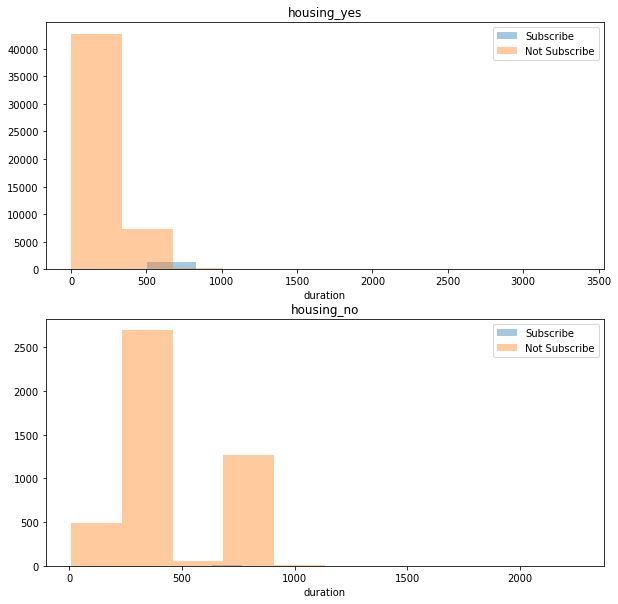

In [30]:
fig, axes = plt.subplots(2, figsize = (10,10))
yes = bank[bank['housing'] == 'yes']
no = bank[bank['housing'] == 'no']
ax = sns.distplot(yes[yes['Subscribe'] == 'yes'].duration.dropna(), bins=9, label=sub, ax=axes[0], kde=False)
ax = sns.distplot(yes[yes['Subscribe'] == 'no'].duration.dropna(), bins=10, label=not_sub, ax=axes[0], kde=False)
ax.legend()
ax.set_title('housing_yes')

ax = sns.distplot(no[no['Subscribe'] == 'yes'].duration.dropna(), bins=9, label=sub, ax=axes[1], kde=False)
ax = sns.distplot(no[no['Subscribe'] == 'no'].duration.dropna(), bins=10, label=not_sub, ax=axes[1], kde=False)
ax.legend()
ax.set_title('housing_no')

#### Từ biểu đồ trên ta rút ra được vài nhận xét như sau:
- Xác xuất người đăng ký khi chưa có nhà là hầu như không có khả thi dù trong khoảng thời gian gọi điện là bao nhiêu đi nữa.
- Xác xuất người có nhà đăng ký tham gia rất thất, nếu khoảng thời gian gọi từ 500 - 800s
- Nhìn chung chiến dịch marketing không khả thi vì khả năng không đăng ký của khách hàng rất cao.

# Câu 4
### Xem xét thống kể giữa Subscribe với Marital (tình trạng hôn nhân), Loan (đã có khoản vay chưa) và Housing

In [48]:
FacetGrid = sns.FacetGrid(bank, row = 'marital', height =4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'duration', 'Subscribe', 'loan', palette =None, order =None, hue_order =None)
FacetGrid.add_legend()

### Từ biểu đồ trên ta rút ra được vài nhận xét:
- Khách hàng đã có khoản vay rồi và đang trong trạng thái độc thân/ đã kết hơn sẽ có khả năng đăng ký cao hơn và ngược lại.
- Khách hàng chưa có khoản vay thì sẽ có khả năng đăng ký cao.

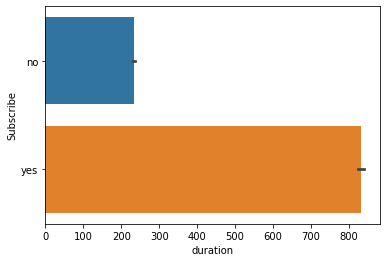

In [47]:
# Vẽ biểu đồ để xem sự phụ thuộc của Duration và Subscribe
sns.barplot(x= 'duration', y='Subscribe', data=bank)

### Từ biểu đồ này ta thấy, khoảng thời gian gọi điện tư vấn khách hàng từ 0 -> 800s là có khả năng đăng ký nhất.

# Câu 5: 
## Thống kê trình độ học vấn và khảo sát với thuộc tính quyết định và đưa ra nhận xét

In [77]:
bank['age'].value_counts().sort_index()

20       7
21      12
22      24
23      49
24      78
25    1336
26     142
27     164
28    1455
29    1491
30     291
31    5386
32    1649
33     366
34     362
35    5297
36    1549
37    2773
38     252
39    1508
40    1531
41    2736
42    3971
43    2723
44    1494
45    2685
46    1457
47     161
48    2643
49    1411
50     143
51    2634
52    1383
53    3885
54    1373
55     136
56    1346
57     125
58      95
59      92
60      85
61       8
Name: age, dtype: int64

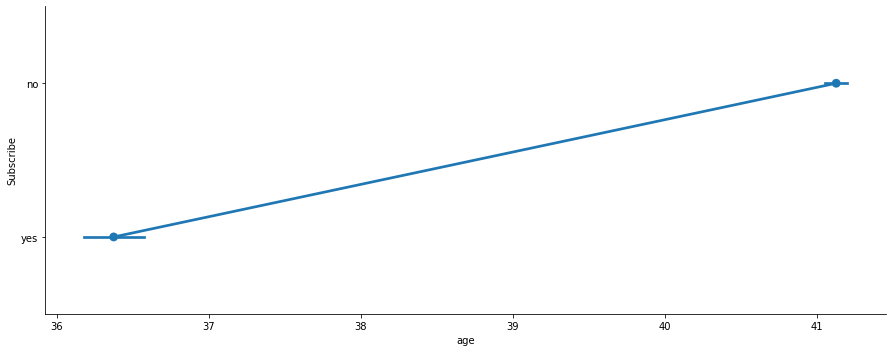

In [62]:
sns.catplot('age', 'Subscribe', data=bank, aspect=2.5, kind='point')

### Từ biểu đồ trên ta rút ra được:
- Những khách hàng từ 41 tuổi đảo lên sẽ có khả năng đăng ký tham gia chiến dịch cao.

# Câu 6
### Tiền xử lý dữ liệu

In [114]:
# Xem qua giá trị null hiện đang có
missing_data

Total        %
pdays       1244  2.16152
duration    1244  2.16152
Subscibe       0  0.00000
housing        0  0.00000
job            0  0.00000
marital        0  0.00000
education      0  0.00000
default        0  0.00000
balance        0  0.00000
contact        0  0.00000
loan           0  0.00000
poutcome       0  0.00000
day            0  0.00000
month          0  0.00000
campaign       0  0.00000
previous       0  0.00000
age            0  0.00000

In [222]:
# Ta thấy pdays không ảnh hưởng nhiều nên ta có thể xóa nó đi
bank =bank.drop('pdays', axis=1)

KeyError: "['pdays'] not found in axis"

In [223]:
# xử lý giá trị missing tại thuộc tính duration bằng giá trị mean
from sklearn.impute import SimpleImputer

In [224]:
est = SimpleImputer(strategy= 'mean')

In [225]:
result = est.fit_transform(bank['duration'].to_frame())

In [226]:
bank['duration'] = result

In [227]:
bank[bank['duration'].isnull()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, previous, poutcome, y]
Index: []

In [234]:
# tập dữ liệu đã hết giá trị null
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57552 entries, 0 to 57551
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        57552 non-null  int64  
 1   job        57552 non-null  object 
 2   marital    57552 non-null  object 
 3   education  57552 non-null  object 
 4   default    57552 non-null  object 
 5   balance    57552 non-null  float64
 6   housing    57552 non-null  object 
 7   loan       57552 non-null  object 
 8   duration   57552 non-null  float64
 9   Subscibe   57552 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.8+ MB


In [229]:
# Xóa những thuộc tính không cần thiết
bank = bank.drop(['contact', 'day', 'month', 'campaign', 'previous','poutcome'], axis =1)

# Câu 7

### Chia nhóm Age, Duration

In [236]:
for data in [bank]:
    data.loc[(data['age'] > 18) & (data['age'] <= 30), 'age'] = 0
    data.loc[(data['age'] > 30) & (data['age'] <= 45), 'age'] = 1
    data.loc[(data['age'] > 45) & (data['age'] <= 55), 'age'] = 2
    data.loc[(data['age'] > 55), 'age' ] = 3

In [271]:
bank['job'].unique()
# ta thấy thuộc tính job có giá trị unknown
# ta sẽ loại bỏ những khách hàng nào có giá trị đó, vì khả năng cao là không có khả năng đóng tiền.
bank = bank[bank['job'] != 'unknown']

In [273]:
# unknown biến mất
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [275]:
# Giá trị -1 có thể là giá trị rỗng nên ta sẽ xóa nó đi
bank['Subscibe'].unique()

array(['no', 'yes', '-1'], dtype=object)

In [277]:
bank = bank[bank['Subscibe'] != '-1']

In [281]:
bank[bank['Subscibe'] == '-1']

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, duration, Subscibe]
Index: []

In [285]:
bank

age           job   marital  education default housing loan  duration  \
0        3    management   married   tertiary      no     yes   no     261.0   
1        1    technician    single  secondary      no     yes   no     151.0   
2        1  entrepreneur   married  secondary      no     yes  yes      76.0   
3        2   blue-collar   married    unknown      no     yes   no      92.0   
5        1    management   married   tertiary      no     yes   no     139.0   
...    ...           ...       ...        ...     ...     ...  ...       ...   
57547    2    technician   married    unknown      no     yes   no     152.0   
57548    1    management    single   tertiary      no     yes   no     147.0   
57549    1        admin.  divorced  secondary      no     yes   no      97.0   
57550    1    management  divorced   tertiary      no      no   no     337.0   
57551    2   blue-collar   married    primary      no     yes   no     113.0   

      Subscibe  
0           no  
1           no  
2           no  
3           no  
5           no  
...        ...  
57547       no  
57548       no  
57549       no  
57550       no  
57551       no  

[56286 rows x 9 columns]

In [284]:
# drop thuoc tinh balance
bank = bank.drop(['balance'], axis= 1)

In [291]:
for data in [bank]:
    data.loc[(data['duration'] <= 120), 'duration' ] = 0 #gọi từ dưới 2 phút
    data.loc[(data['duration'] > 120) & (data['duration'] <= 300), 'duration'] = 1 #từ 2 đến 5 phút
    data.loc[(data['duration'] > 300) & (data['duration'] <= 900), 'duration'] = 2 # từ 5 đến 15
    data.loc[(data['duration'] > 900) & (data['duration'] <= 1800), 'duration'] = 3 # từ 15 đến 30
    data.loc[(data['duration'] > 1800), 'duration' ] = 4 # trên 30

In [287]:
bank['duration'].min()

0.0

In [288]:
bank['duration'].max()

3366.0

In [294]:
bank['duration'] = bank['duration'].astype(int)

In [295]:
bank

age           job   marital  education default housing loan  duration  \
0        3    management   married   tertiary      no     yes   no         1   
1        1    technician    single  secondary      no     yes   no         1   
2        1  entrepreneur   married  secondary      no     yes  yes         0   
3        2   blue-collar   married    unknown      no     yes   no         0   
5        1    management   married   tertiary      no     yes   no         1   
...    ...           ...       ...        ...     ...     ...  ...       ...   
57547    2    technician   married    unknown      no     yes   no         1   
57548    1    management    single   tertiary      no     yes   no         1   
57549    1        admin.  divorced  secondary      no     yes   no         0   
57550    1    management  divorced   tertiary      no      no   no         2   
57551    2   blue-collar   married    primary      no     yes   no         0   

      Subscibe  
0           no  
1           no  
2           no  
3           no  
5           no  
...        ...  
57547       no  
57548       no  
57549       no  
57550       no  
57551       no  

[56286 rows x 9 columns]

In [296]:
status = {'married': 1, 'single' :2, 'divorced': 3}

In [297]:
for data in [bank]:
    data['marital'] = data['marital'].map(status)

In [298]:
bank

age           job  marital  education default housing loan  duration  \
0        3    management        1   tertiary      no     yes   no         1   
1        1    technician        2  secondary      no     yes   no         1   
2        1  entrepreneur        1  secondary      no     yes  yes         0   
3        2   blue-collar        1    unknown      no     yes   no         0   
5        1    management        1   tertiary      no     yes   no         1   
...    ...           ...      ...        ...     ...     ...  ...       ...   
57547    2    technician        1    unknown      no     yes   no         1   
57548    1    management        2   tertiary      no     yes   no         1   
57549    1        admin.        3  secondary      no     yes   no         0   
57550    1    management        3   tertiary      no      no   no         2   
57551    2   blue-collar        1    primary      no     yes   no         0   

      Subscibe  
0           no  
1           no  
2           no  
3           no  
5           no  
...        ...  
57547       no  
57548       no  
57549       no  
57550       no  
57551       no  

[56286 rows x 9 columns]

In [299]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [302]:
for data in [bank]:
    data['education'] = data['education'].map(educations)
    
bank

age           job  marital  education default housing loan  duration  \
0        3    management        1          3      no     yes   no         1   
1        1    technician        2          2      no     yes   no         1   
2        1  entrepreneur        1          2      no     yes  yes         0   
3        2   blue-collar        1          0      no     yes   no         0   
5        1    management        1          3      no     yes   no         1   
...    ...           ...      ...        ...     ...     ...  ...       ...   
57547    2    technician        1          0      no     yes   no         1   
57548    1    management        2          3      no     yes   no         1   
57549    1        admin.        3          2      no     yes   no         0   
57550    1    management        3          3      no      no   no         2   
57551    2   blue-collar        1          1      no     yes   no         0   

      Subscibe  
0           no  
1           no  
2           no  
3           no  
5           no  
...        ...  
57547       no  
57548       no  
57549       no  
57550       no  
57551       no  

[56286 rows x 9 columns]

# Câu 8: 
## Tạo thuộc tính age_duration

In [305]:
# Tạo thuộc tính Age * Duration
for data in [bank]:
    data['age_duration'] = data['age'] * data['duration']

In [306]:
bank

age           job  marital  education default housing loan  duration  \
0        3    management        1          3      no     yes   no         1   
1        1    technician        2          2      no     yes   no         1   
2        1  entrepreneur        1          2      no     yes  yes         0   
3        2   blue-collar        1          0      no     yes   no         0   
5        1    management        1          3      no     yes   no         1   
...    ...           ...      ...        ...     ...     ...  ...       ...   
57547    2    technician        1          0      no     yes   no         1   
57548    1    management        2          3      no     yes   no         1   
57549    1        admin.        3          2      no     yes   no         0   
57550    1    management        3          3      no      no   no         2   
57551    2   blue-collar        1          1      no     yes   no         0   

      Subscibe  age_duration  
0           no             3  
1           no             1  
2           no             0  
3           no             0  
5           no             1  
...        ...           ...  
57547       no             2  
57548       no             1  
57549       no             0  
57550       no             2  
57551       no             0  

[56286 rows x 10 columns]